# Library

In [78]:
import pandas as pd
import numpy as np
import pandahouse

import datetime
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import orbit
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.backtest import BackTester

# Подключение к учебной базе

In [113]:
connect = {'host':'https://clickhouse.lab.karpov.courses',
           'password':'dpo_python_2020',
           'user':'student',
           'database':'simulator_20240120'}

query = '''select toDate(time) day,
                  uniqExact(user_id) dau,
                  count(receiver_id) activity
            from simulator_20240120.message_actions
            group by day
            having day < '2024-02-01'                         --prediction to february
            order by day'''

mess_activity = pandahouse.read_clickhouse(query, connection=connect)

query = '''select toDate(time) day,
                  uniqExact(user_id) dau,
                  count(action) activity
            from simulator_20240120.feed_actions
            group by day
            having day < '2024-02-01'                         --prediction to february
            order by day'''

feed_activity = pandahouse.read_clickhouse(query, connection=connect)

# save
mess_activity.to_csv('data/mess_activity.csv', index=False)
feed_activity.to_csv('data/feed_activity.csv', index=False)

In [114]:
mess_activity = pd.read_csv('data/mess_activity.csv')
feed_activity = pd.read_csv('data/feed_activity.csv')

mess_activity['day'] = mess_activity['day'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
feed_activity['day'] = feed_activity['day'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Analysis

## Messenger

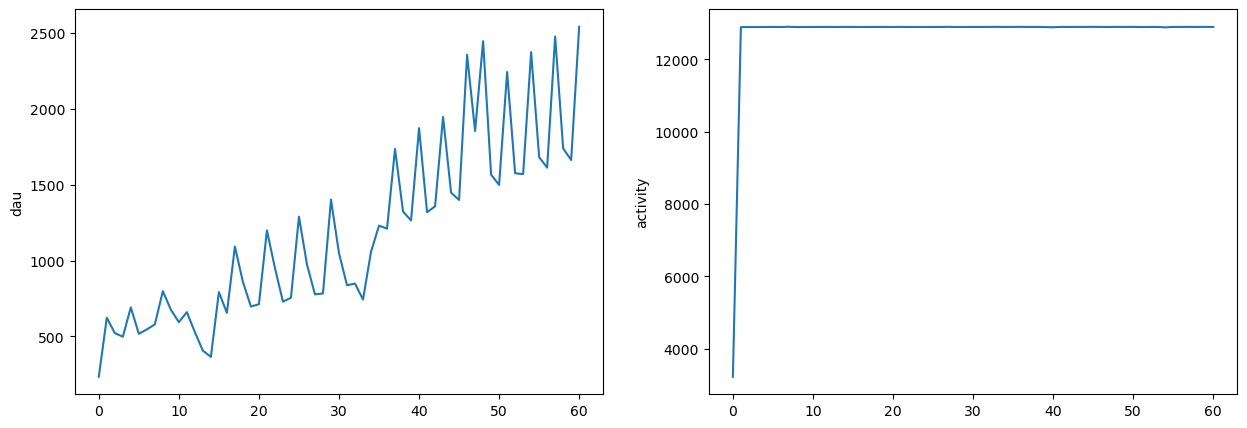

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.lineplot(mess_activity['dau'], ax=ax[0])
sns.lineplot(mess_activity['activity'], ax=ax[1])
plt.show()

Finding anomalies (messenger had't any marketing program, this anomalies is randomly) 

In [119]:
mess_activity[mess_activity['day'] > '2024-01-15']

,day,dau,activity
45,2024-01-16,1399,12902
46,2024-01-17,2355,12899
47,2024-01-18,1853,12899
48,2024-01-19,2445,12901
49,2024-01-20,1566,12900
50,2024-01-21,1498,12901
51,2024-01-22,2242,12896
52,2024-01-23,1575,12899
53,2024-01-24,1569,12900
54,2024-01-25,2373,12888


In [120]:
mess_activity['anomaly'] = np.where((mess_activity['day'] == '2024-01-17') & 
                                    (mess_activity['day'] == '2024-01-19'), 1, 0)

In [122]:
# data standartization
dau_mean = mess_activity['dau'].mean()
dau_std = mess_activity['dau'].std()

activity_mean = mess_activity['activity'].mean()
activity_std = mess_activity['activity'].std()

mess_activity['dau_st'] = (mess_activity['dau'] - dau_mean) / dau_std
mess_activity['activity_st'] = (mess_activity['activity'] - activity_mean) / activity_std

Models:
1. Linear
2. Linear with trend and regressor
3. Linear with trend and regressor, and anomaly

2024-03-01 12:29:42 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

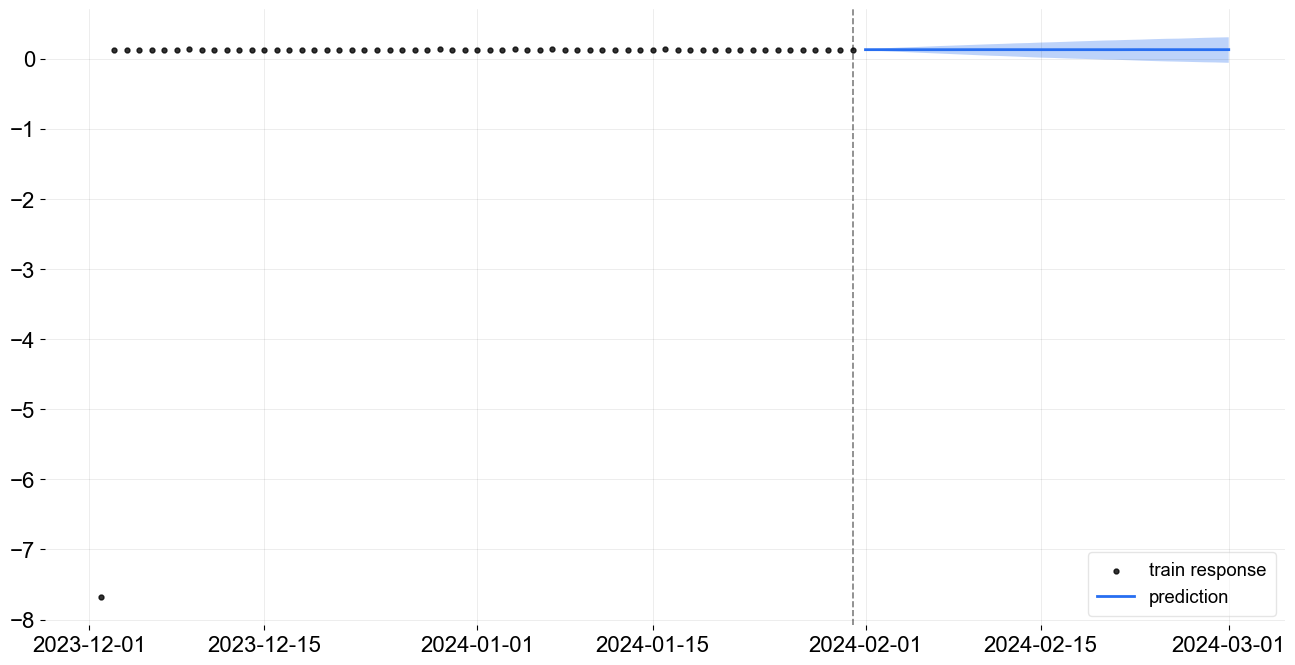

2024-03-01 12:30:07 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:01 Status

2024-03-01 12:30:09 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 12:30:12 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 12:30:16 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 12:30:18 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 12:30:21 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 12:30:24 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

,metric_name,metric_values,is_training_metric
0,smape,0.204127,False
1,wmape,0.238728,False
2,mape,0.238986,False
3,mse,0.009634,False
4,mae,0.030584,False
5,rmsse,31.742058,False


In [124]:
# Linear model
lin_m = DLT(response_col='activity_st', date_col='day',
            estimator='stan-mcmc', global_trend_option='linear',
            num_warmup=10000, num_sample=10000)

# fit model
lin_m.fit(mess_activity)

# prediction
lin_m_future_df = lin_m.make_future_df(periods=30)
lin_m_predicted_df = lin_m.predict(lin_m_future_df)
_ = plot_predicted_data(mess_activity, lin_m_predicted_df, 'day', 'activity_st')
plt.show()

#testing
bt_roll = BackTester(model=lin_m, df=mess_activity,
                     min_train_len=7, incremental_len=7, forecast_len=7,
                     window_type='rolling')
bt_roll.fit_predict()
bt_roll.score()

In [146]:
# # Linear model with trend and regressor 
# lin_tr_m = DLT(response_col='activity_st', date_col='day',
#                estimator='stan-mcmc', global_trend_option='linear',
#                regressor_col=['dau_st'], regressor_sign=['+'],
#                num_warmup=10000, num_sample=10000)

# # fit model
# lin_tr_m.fit(mess_activity)

# # prediction
# lin_tr_m_future_df = lin_tr_m.make_future_df(periods=30)
# lin_tr_m_future_df['dau_st'] = lin_m_predicted_df.prediction
# lin_tr_m_predicted_df = lin_tr_m.predict(lin_tr_m_future_df)
# _ = plot_predicted_data(mess_activity, lin_tr_m_predicted_df, 'day', 'activity_st')
# plt.show()

# #testing
# bt_roll = BackTester(model=lin_tr_m, df=mess_activity,
#                      min_train_len=7, incremental_len=7, forecast_len=7,
#                      window_type='rolling')
# bt_roll.fit_predict()
# bt_roll.score()

In [147]:
# # Linear with trend and regressor, and anomaly
# lin_tra_m = DLT(response_col='activity_st', date_col='day',
#             estimator='stan-mcmc', global_trend_option='linear',
#             regressor_col=['dau_st', 'anomaly'], regressor_sign=['+', '+'],
#             num_warmup=10000, num_sample=10000)

# # fit model
# lin_tra_m.fit(mess_activity)

# # prediction
# lin_tra_m_future_df = lin_tra_m.make_future_df(periods=30)
# lin_tra_m_future_df['dau_st'] = lin_m_predicted_df.prediction
# lin_tra_m_future_df['anomaly'] = 0
# lin_tra_m_predicted_df = lin_tra_m.predict(lin_tra_m_future_df)
# _ = plot_predicted_data(mess_activity, lin_tra_m_predicted_df, 'day', 'activity_st')
# plt.show()

# #testing
# bt_roll = BackTester(model=lin_tr_m, df=mess_activity,
#                      min_train_len=7, incremental_len=7, forecast_len=7,
#                      window_type='rolling')
# bt_roll.fit_predict()
# bt_roll.score()

## Feed

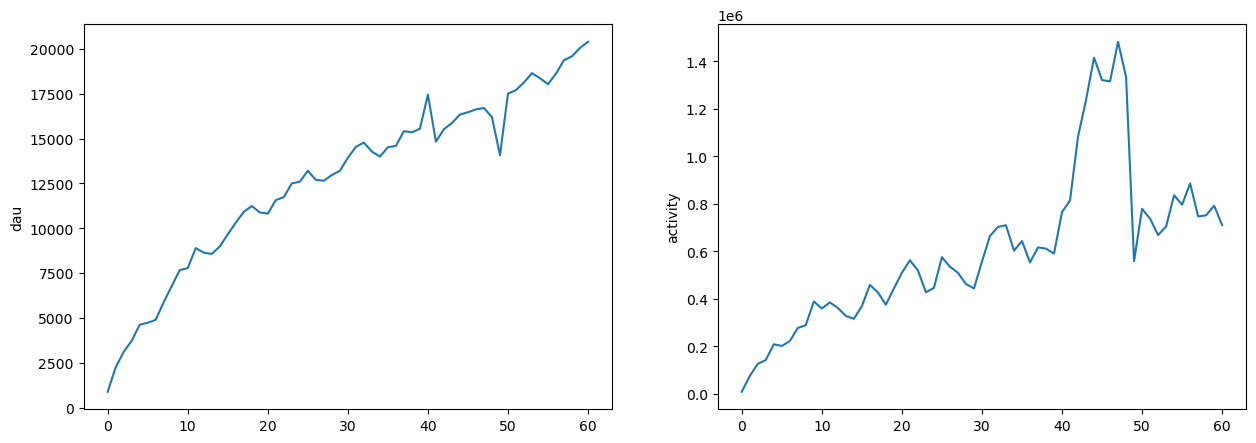

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.lineplot(feed_activity['dau'], ax=ax[0])
sns.lineplot(feed_activity['activity'], ax=ax[1])
plt.show()

Finding anomalies

Feed had different marketing programs:
1. ADS campaign 2024-01-11 
2. Flashmob from 2024-01-12 to 2024-01-18
3. Audience decline after Flashmob

In [130]:
feed_activity[(feed_activity['day'] > '2024-01-9') & (feed_activity['day'] < '2024-01-22')]

,day,dau,activity
39,2024-01-10,15549,590666
40,2024-01-11,17452,765165
41,2024-01-12,14829,814364
42,2024-01-13,15526,1082642
43,2024-01-14,15867,1236421
44,2024-01-15,16341,1415092
45,2024-01-16,16469,1320575
46,2024-01-17,16632,1315324
47,2024-01-18,16705,1481844
48,2024-01-19,16195,1334298


In [131]:
feed_activity['anomaly'] = np.where((feed_activity['day'] == '2024-01-11') & 
                                    (feed_activity['day'] >= '2024-01-13') & (feed_activity['day'] <= '2024-01-19') & 
                                    (feed_activity['day'] == '2024-01-20'), 1, 0)

In [132]:
# data standartization
dau_mean = feed_activity['dau'].mean()
dau_std = feed_activity['dau'].std()

activity_mean = feed_activity['activity'].mean()
activity_std = feed_activity['activity'].std()

feed_activity['dau_st'] = (feed_activity['dau'] - dau_mean) / dau_std
feed_activity['activity_st'] = (feed_activity['activity'] - activity_mean) / activity_std

Models:
1. Linear
2. Loglinear
3. Linear with trend and regressor
4. Loglinear with trend and regressor
5. Linear with trend and regressor, and anomaly
6. Loglinear with trend and regressor, and anomaly

In [141]:
# # Linear model
# lin_m = DLT(response_col='activity_st', date_col='day',
#             estimator='stan-mcmc', global_trend_option='linear',
#             num_warmup=10000, num_sample=10000)

# # fit model
# lin_m.fit(feed_activity)

# # prediction
# lin_m_future_df = lin_m.make_future_df(periods=30)
# lin_m_predicted_df = lin_m.predict(lin_m_future_df)
# _ = plot_predicted_data(feed_activity, lin_m_predicted_df, 'day', 'activity_st')
# plt.show()

# #testing
# bt_roll = BackTester(model=lin_m, df=feed_activity,
#                      min_train_len=7, incremental_len=7, forecast_len=7,
#                      window_type='rolling')
# bt_roll.fit_predict()
# bt_roll.score()

2024-03-01 13:00:39 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

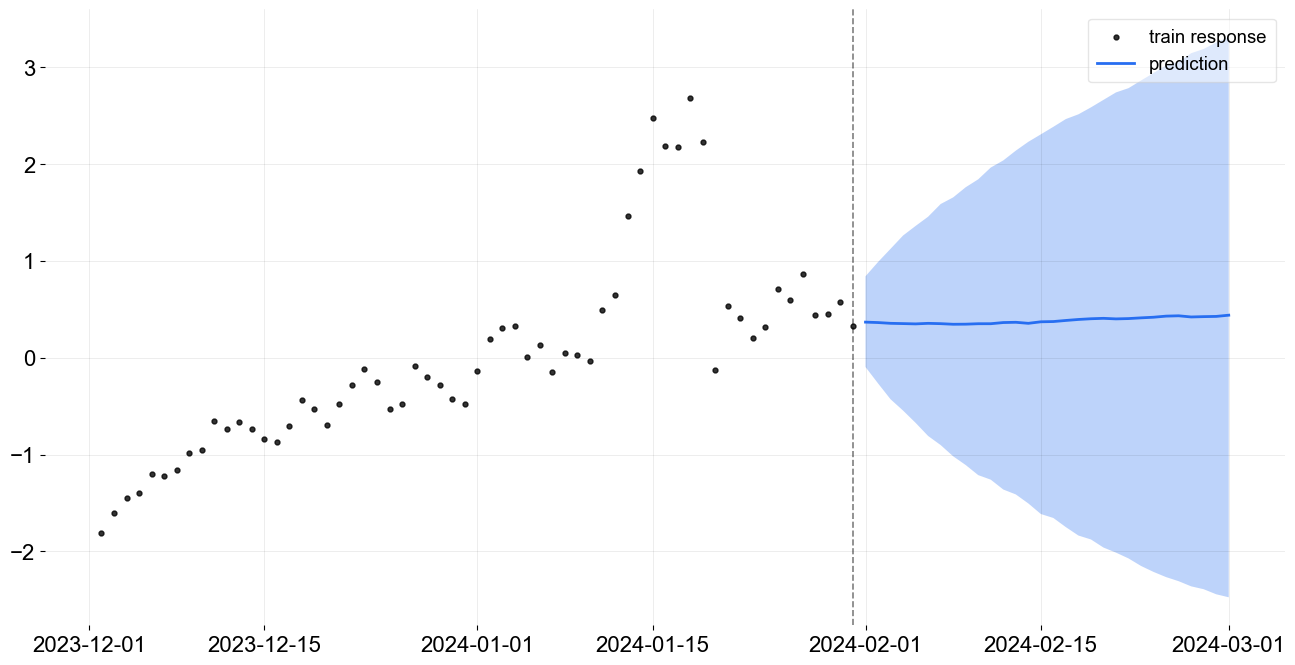

2024-03-01 13:00:45 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 13:00:46 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 13:00:48 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 13:00:50 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 13:00:51 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 13:00:54 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-03-01 13:00:55 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 2500 and samples(per chain): 2500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

,metric_name,metric_values,is_training_metric
0,smape,0.844601,False
1,wmape,0.975159,False
2,mape,6.060079,False
3,mse,0.990123,False
4,mae,0.655570,False
5,rmsse,2.243183,False


In [135]:
# Loglinear model
log_m = DLT(response_col='activity_st', date_col='day',
            estimator='stan-mcmc', global_trend_option='loglinear',
            num_warmup=10000, num_sample=10000)

# fit model
log_m.fit(feed_activity)

# prediction
log_m_future_df = log_m.make_future_df(periods=30)
log_m_predicted_df = log_m.predict(log_m_future_df)
_ = plot_predicted_data(feed_activity, log_m_predicted_df, 'day', 'activity_st')
plt.show()

#testing
bt_roll = BackTester(model=log_m, df=feed_activity,
                     min_train_len=7, incremental_len=7, forecast_len=7,
                     window_type='rolling')
bt_roll.fit_predict()
bt_roll.score()

In [142]:
# # Linear model with trend and regressor 
# lin_tr_m = DLT(response_col='activity_st', date_col='day',
#                estimator='stan-mcmc', global_trend_option='linear',
#                regressor_col=['dau_st'], regressor_sign=['+'],
#                num_warmup=10000, num_sample=10000)

# # fit model
# lin_tr_m.fit(feed_activity)

# # prediction
# lin_tr_m_future_df = lin_tr_m.make_future_df(periods=30)
# lin_tr_m_future_df['dau_st'] = lin_m_predicted_df.prediction
# lin_tr_m_predicted_df = lin_tr_m.predict(lin_tr_m_future_df)
# _ = plot_predicted_data(feed_activity, lin_tr_m_predicted_df, 'day', 'activity_st')
# plt.show()

# #testing
# bt_roll = BackTester(model=lin_tr_m, df=feed_activity,
#                      min_train_len=7, incremental_len=7, forecast_len=7,
#                      window_type='rolling')
# bt_roll.fit_predict()
# bt_roll.score()

In [144]:
# # Loglinear model with trend and regressor 
# log_tr_m = DLT(response_col='activity_st', date_col='day',
#             estimator='stan-mcmc', global_trend_option='loglinear',
#             regressor_col=['dau_st'], regressor_sign=['+'],
#             num_warmup=10000, num_sample=10000)

# # fit model
# log_tr_m.fit(feed_activity)

# # prediction
# log_tr_m_future_df = log_tr_m.make_future_df(periods=30)
# log_tr_m_future_df['dau_st'] = log_m_predicted_df.prediction
# log_tr_m_predicted_df = log_tr_m.predict(log_tr_m_future_df)
# _ = plot_predicted_data(feed_activity, log_tr_m_predicted_df, 'day', 'activity_st')
# plt.show()

# #testing
# bt_roll = BackTester(model=log_tr_m, df=feed_activity,
#                      min_train_len=7, incremental_len=7, forecast_len=7,
#                      window_type='rolling')
# bt_roll.fit_predict()
# bt_roll.score()

In [143]:
# # Linear with trend and regressor, and anomaly
# lin_tra_m = DLT(response_col='activity_st', date_col='day',
#             estimator='stan-mcmc', global_trend_option='linear',
#             regressor_col=['dau_st', 'anomaly'], regressor_sign=['+', '+'],
#             num_warmup=10000, num_sample=10000)

# # fit model
# lin_tra_m.fit(feed_activity)

# # prediction
# lin_tra_m_future_df = lin_tra_m.make_future_df(periods=30)
# lin_tra_m_future_df['dau_st'] = lin_m_predicted_df.prediction
# lin_tra_m_future_df['anomaly'] = 0
# lin_tra_m_predicted_df = lin_tra_m.predict(lin_tra_m_future_df)
# _ = plot_predicted_data(feed_activity, lin_tra_m_predicted_df, 'day', 'activity_st')
# plt.show()

# #testing
# bt_roll = BackTester(model=lin_tra_m, df=feed_activity,
#                      min_train_len=7, incremental_len=7, forecast_len=7,
#                      window_type='rolling')
# bt_roll.fit_predict()
# bt_roll.score()

In [145]:
# # Loglinear with trend and regressor, and anomaly
# log_tra_m = DLT(response_col='activity_st', date_col='day',
#             estimator='stan-mcmc', global_trend_option='loglinear',
#             regressor_col=['dau_st', 'anomaly'], regressor_sign=['+', '+'],
#             num_warmup=10000, num_sample=10000)

# # fit model
# log_tra_m.fit(feed_activity)

# # prediction period
# log_tra_m_future_df = log_tra_m.make_future_df(periods=30)
# log_tra_m_future_df['dau_st'] = log_m_predicted_df.prediction
# log_tra_m_future_df['anomaly'] = 0
# log_tra_m_predicted_df = log_tra_m.predict(log_tra_m_future_df)
# _ = plot_predicted_data(feed_activity, log_tra_m_predicted_df, 'day', 'activity_st')
# plt.show()

# #testing
# bt_roll = BackTester(model=log_tra_m, df=feed_activity,
#                      min_train_len=7, incremental_len=7, forecast_len=7,
#                      window_type='rolling')
# bt_roll.fit_predict()
# bt_roll.score()